In [113]:
import nltk
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
import re, collections
from collections import defaultdict
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.svm import SVR
from sklearn import ensemble
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import cohen_kappa_score
from nltk.corpus import stopwords
%matplotlib inline
from sklearn.decomposition import PCA
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy import sparse as sp_sparse


In [167]:
dataframe = pd.read_csv('data/essays_and_scores.csv', encoding = 'latin-1')
train = pd.read_csv('data/training_set_rel3.tsv',sep='\t', encoding = 'latin-1')
test = pd.read_csv('data/test_set.tsv',sep='\t', encoding = 'latin-1')

In [4]:
dataframe.head()

,essay_id,essay_set,essay,rater1_domain1,rater2_domain1,domain1_score
0,1,1,"Dear local newspaper, I think effects computer...",4.0,4.0,8.0
1,2,1,"Dear @CAPS1 @CAPS2, I believe that using compu...",5.0,4.0,9.0
2,3,1,"Dear, @CAPS1 @CAPS2 @CAPS3 More and more peopl...",4.0,3.0,7.0
3,4,1,"Dear Local Newspaper, @CAPS1 I have found that...",5.0,5.0,10.0
4,5,1,"Dear @LOCATION1, I know having computers has a...",4.0,4.0,8.0


In [5]:
train.head()

,essay_id,essay_set,essay,rater1_domain1,rater2_domain1,rater3_domain1,domain1_score,rater1_domain2,rater2_domain2,domain2_score,...,rater2_trait3,rater2_trait4,rater2_trait5,rater2_trait6,rater3_trait1,rater3_trait2,rater3_trait3,rater3_trait4,rater3_trait5,rater3_trait6
0,1,1,"Dear local newspaper, I think effects computer...",4,4,NaN,8,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,1,"Dear @CAPS1 @CAPS2, I believe that using compu...",5,4,NaN,9,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,1,"Dear, @CAPS1 @CAPS2 @CAPS3 More and more peopl...",4,3,NaN,7,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,1,"Dear Local Newspaper, @CAPS1 I have found that...",5,5,NaN,10,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,1,"Dear @LOCATION1, I know having computers has a...",4,4,NaN,8,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
test.head()

,essay_id,essay_set,essay,domain1_predictionid,domain2_predictionid
0,2383,1,I believe that computers have a positive effec...,2383,NaN
1,2384,1,"Dear @CAPS1, I know some problems have came up...",2384,NaN
2,2385,1,"Dear to whom it @MONTH1 concern, Computers are...",2385,NaN
3,2386,1,"Dear @CAPS1 @CAPS2, @CAPS3 has come to my atte...",2386,NaN
4,2387,1,"Dear Local newspaper, I think that people have...",2387,NaN


In [43]:
#domain 1, y_score: domain1_score, range 2-12 
train_d1 = train[train['essay_set']==1]
test_d1 = test[test['essay_set']==1]
print(train_d1.shape)
train_d1.head()

(1783, 28)


,essay_id,essay_set,essay,rater1_domain1,rater2_domain1,rater3_domain1,domain1_score,rater1_domain2,rater2_domain2,domain2_score,...,rater2_trait3,rater2_trait4,rater2_trait5,rater2_trait6,rater3_trait1,rater3_trait2,rater3_trait3,rater3_trait4,rater3_trait5,rater3_trait6
0,1,1,"Dear local newspaper, I think effects computer...",4,4,NaN,8,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,1,"Dear @CAPS1 @CAPS2, I believe that using compu...",5,4,NaN,9,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,1,"Dear, @CAPS1 @CAPS2 @CAPS3 More and more peopl...",4,3,NaN,7,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,1,"Dear Local Newspaper, @CAPS1 I have found that...",5,5,NaN,10,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,1,"Dear @LOCATION1, I know having computers has a...",4,4,NaN,8,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [44]:
train_d1.name = 'dataset 1'

In [12]:
#domain 2, y1 = domain1_score (1-6), y2 = domain2_score (1-4)
train_d2 = train[train['essay_set']==2]
test_d2 = test[test['essay_set']==2]
print(train_d2.shape)
train_d2.head()

(1800, 28)


,essay_id,essay_set,essay,rater1_domain1,rater2_domain1,rater3_domain1,domain1_score,rater1_domain2,rater2_domain2,domain2_score,...,rater2_trait3,rater2_trait4,rater2_trait5,rater2_trait6,rater3_trait1,rater3_trait2,rater3_trait3,rater3_trait4,rater3_trait5,rater3_trait6
1783,2978,2,Certain materials being removed from libraries...,4,4,NaN,4,4.0,4.0,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1784,2979,2,Write a persuasive essay to a newspaper reflec...,1,2,NaN,1,1.0,2.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1785,2980,2,Do you think that libraries should remove cert...,2,3,NaN,2,3.0,3.0,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1786,2981,2,"In @DATE1's world, there are many things found...",4,4,NaN,4,4.0,4.0,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1787,2982,2,In life you have the 'offensive things'. The l...,4,4,NaN,4,4.0,4.0,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
#domain 3, y1 = domain1_score (0-3),
train_d3 = train[train['essay_set']==3]
test_d3 = test[test['essay_set']==3]
print(train_d3.shape)
train_d3.head()

(1726, 28)


,essay_id,essay_set,essay,rater1_domain1,rater2_domain1,rater3_domain1,domain1_score,rater1_domain2,rater2_domain2,domain2_score,...,rater2_trait3,rater2_trait4,rater2_trait5,rater2_trait6,rater3_trait1,rater3_trait2,rater3_trait3,rater3_trait4,rater3_trait5,rater3_trait6
3583,5978,3,The features of the setting affect the cyclist...,1,1,NaN,1,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3584,5979,3,The features of the setting affected the cycli...,2,2,NaN,2,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3585,5980,3,Everyone travels to unfamiliar places. Sometim...,1,1,NaN,1,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3586,5981,3,I believe the features of the cyclist affected...,1,1,NaN,1,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3587,5982,3,The setting effects the cyclist because of the...,2,2,NaN,2,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
#domain 4, y1 = domain1_score (0-3),
train_d4 = train[train['essay_set']==4]
test_d4 = test[test['essay_set']==4]
print(train_d4.shape)
train_d4.head()

(1770, 28)


,essay_id,essay_set,essay,rater1_domain1,rater2_domain1,rater3_domain1,domain1_score,rater1_domain2,rater2_domain2,domain2_score,...,rater2_trait3,rater2_trait4,rater2_trait5,rater2_trait6,rater3_trait1,rater3_trait2,rater3_trait3,rater3_trait4,rater3_trait5,rater3_trait6
5309,8863,4,The author concludes the story with this becau...,0,0,NaN,0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5310,8864,4,The narrater has that in with Paragraph becuse...,0,0,NaN,0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5311,8865,4,The author concludes the story with that passa...,3,2,NaN,3,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5312,8866,4,The author ended the story with this paragraph...,1,2,NaN,2,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5313,8867,4,The author concludes the story with this parag...,2,2,NaN,2,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
#domain 5, y1 = domain1_score (0-4),
train_d5 = train[train['essay_set']==5]
test_d5 = test[test['essay_set']==5]
print(train_d5.shape)
train_d5.head()

(1805, 28)


,essay_id,essay_set,essay,rater1_domain1,rater2_domain1,rater3_domain1,domain1_score,rater1_domain2,rater2_domain2,domain2_score,...,rater2_trait3,rater2_trait4,rater2_trait5,rater2_trait6,rater3_trait1,rater3_trait2,rater3_trait3,rater3_trait4,rater3_trait5,rater3_trait6
7079,11827,5,"In this memoir of Narciso Rodriguez, @PERSON3'...",2,2,NaN,2,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7080,11828,5,Throughout the excerpt from Home the Blueprint...,2,2,NaN,2,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7081,11829,5,The mood the author created in the memoir is l...,3,3,NaN,3,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7082,11830,5,The mood created by the author is showing how ...,1,0,NaN,1,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7083,11831,5,The mood created in the memoir is happiness an...,2,3,NaN,3,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
#domain 6, y1 = domain1_score (0-4),
train_d6 = train[train['essay_set']==6]
test_d6 = test[test['essay_set']==6]
print(train_d6.shape)
train_d6.head()

(1800, 28)


,essay_id,essay_set,essay,rater1_domain1,rater2_domain1,rater3_domain1,domain1_score,rater1_domain2,rater2_domain2,domain2_score,...,rater2_trait3,rater2_trait4,rater2_trait5,rater2_trait6,rater3_trait1,rater3_trait2,rater3_trait3,rater3_trait4,rater3_trait5,rater3_trait6
8884,14834,6,There were many obstacles that the builders fa...,2,2,NaN,2,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8885,14835,6,"Him from the start, there would have been many...",3,3,NaN,3,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8886,14836,6,The builders of the Empire State Building face...,3,4,NaN,4,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8887,14837,6,In the passage The Mooring Mast by Marcia Amid...,1,1,NaN,1,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8888,14838,6,The builders of the Empire State Building face...,3,3,NaN,3,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
#domain 7, y1 = domain1_score (0-30),
train_d7 = train[train['essay_set']==7]
test_d7 = test[test['essay_set']==7]
print(train_d7.shape)
train_d7.head()

(1569, 28)


,essay_id,essay_set,essay,rater1_domain1,rater2_domain1,rater3_domain1,domain1_score,rater1_domain2,rater2_domain2,domain2_score,...,rater2_trait3,rater2_trait4,rater2_trait5,rater2_trait6,rater3_trait1,rater3_trait2,rater3_trait3,rater3_trait4,rater3_trait5,rater3_trait6
10684,17834,7,Patience is when your waiting .I was patience ...,8,7,NaN,15,NaN,NaN,NaN,...,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10685,17836,7,"I am not a patience person, like I cant sit i...",6,7,NaN,13,NaN,NaN,NaN,...,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10686,17837,7,One day I was at basketball practice and I was...,7,8,NaN,15,NaN,NaN,NaN,...,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10687,17838,7,I going to write about a time when I went to t...,8,9,NaN,17,NaN,NaN,NaN,...,2.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10688,17839,7,It can be very hard for somebody to be patient...,7,6,NaN,13,NaN,NaN,NaN,...,1.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
#domain 8, y1 = domain1_score (0-60),
train_d8 = train[train['essay_set']==8]
test_d8 = test[test['essay_set']==8]
print(train_d8.shape)
train_d8.head()

(723, 28)


,essay_id,essay_set,essay,rater1_domain1,rater2_domain1,rater3_domain1,domain1_score,rater1_domain2,rater2_domain2,domain2_score,...,rater2_trait3,rater2_trait4,rater2_trait5,rater2_trait6,rater3_trait1,rater3_trait2,rater3_trait3,rater3_trait4,rater3_trait5,rater3_trait6
12253,20716,8,A long time ago when I was in third grade I h...,18,16,NaN,34,NaN,NaN,NaN,...,4.0,4.0,3.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN
12254,20717,8,Softball has to be one of the single most gre...,21,26,46.0,46,NaN,NaN,NaN,...,6.0,6.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,4.0
12255,20718,8,"Some people like making people laugh, I love ...",15,20,40.0,40,NaN,NaN,NaN,...,5.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0
12256,20719,8,"""LAUGHTER"" @CAPS1 I hang out with my friends...",12,20,30.0,30,NaN,NaN,NaN,...,4.0,4.0,4.0,4.0,3.0,3.0,3.0,3.0,3.0,3.0
12257,20721,8,Well ima tell a story about the time i got @CA...,11,15,NaN,26,NaN,NaN,NaN,...,3.0,3.0,3.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN


In [173]:
train_d3.name = 'dataset 3'
train_d4.name = 'dataset 4'
train_d5.name = 'dataset 5'
train_d6.name = 'dataset 6'
train_d7.name = 'dataset 7'
train_d8.name = 'dataset 8'

# Data analysis and visualization

In [49]:
# Boxlot can be used to visualize the distribution of domain1_score values over each essay set.
def y_boxplot(df, column_name):
    df.boxplot(column= column_name, figsize=(10, 10))
    plt.show()

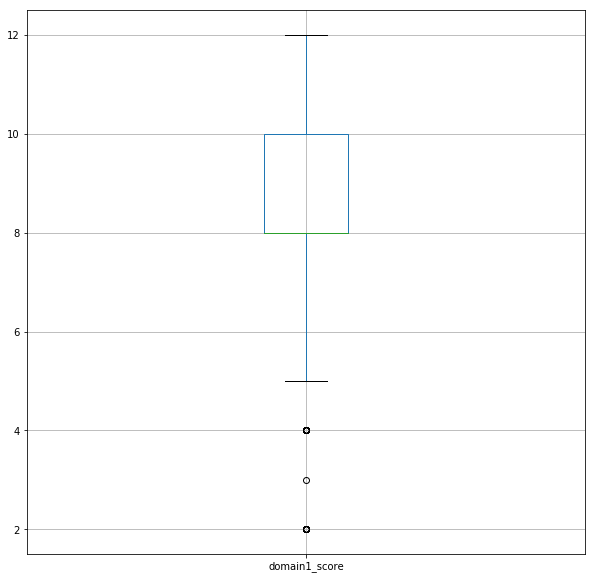

In [50]:
y_boxplot(train_d1, 'domain1_score')

# choose the X, y for data analysis, processing, and modeling

In [24]:
# dataset 1

In [23]:
data1 = train_d1[['essay','domain1_score']].copy()
print(data1)

                                                  essay  domain1_score
0     Dear local newspaper, I think effects computer...              8
1     Dear @CAPS1 @CAPS2, I believe that using compu...              9
2     Dear, @CAPS1 @CAPS2 @CAPS3 More and more peopl...              7
3     Dear Local Newspaper, @CAPS1 I have found that...             10
4     Dear @LOCATION1, I know having computers has a...              8
5     Dear @LOCATION1, I think that computers have a...              8
6     Did you know that more and more people these d...             10
7     @PERCENT1 of people agree that computers make ...             10
8     Dear reader, @ORGANIZATION1 has had a dramatic...              9
9     In the @LOCATION1 we have the technology of a ...              9
10    Dear @LOCATION1, @CAPS1 people acknowledge the...              8
11    Dear @CAPS1 @CAPS2 I feel that computers do ta...              8
12    Dear local newspaper I raed ur argument on the...              7
13    

# Data analysis

In [25]:
#Tokenize a sentence into words
def sentence_to_wordlist(input_sentence):
    REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\|@,;]') #commonly used symbols to space
    BAD_SYMBOLS_RE = re.compile('[^0-9a-z #+_]') #special symbols to space
    input_sentence = input_sentence.lower()# lowercase text
    input_sentence = REPLACE_BY_SPACE_RE.sub(r' ',input_sentence).strip()# replace REPLACE_BY_SPACE_RE symbols by space in text
    input_sentence = BAD_SYMBOLS_RE.sub(r'',input_sentence)# delete symbols which are in BAD_SYMBOLS_RE from text
    input_sentence = " ".join([word for word in input_sentence.split()])# delete stopwords from text
    return nltk.word_tokenize(input_sentence)

In [26]:
#Tokenize an essay into list of words
def essay_to_wordlists(input_essay):
    stripped_essay = input_essay.strip()
    tokenizer = nltk.data.load('tokenizers/punkt/english.pickle')
    sentences = tokenizer.tokenize(stripped_essay)
    tokenized_sentences = []
    for sentence in sentences:
        if len(sentence) > 0:
            sentence = sentence_to_wordlist(sentence)
            if sentence != []:
                tokenized_sentences.append(sentence)
    return tokenized_sentences

In [27]:
tokenized_sentences = essay_to_wordlists(data1['essay'][77])

In [28]:
len(tokenized_sentences) # how many sentence --> list in an essay

32

In [30]:
#use tokenized_sentences
avg_word_lengths = []
word_counts = []
sentence_counts = []
for i in range(len(data1)):
    #print(i)
    tokenized_sentences = essay_to_wordlists(data1['essay'][i])
    avg_wordlength_in_sentences = []
    sentence_counts.append(len(tokenized_sentences))
    words_in_sentence = 0
    for s in tokenized_sentences:
        words_in_sentence += len(s)
        word_len_in_s = [len(word) for word in s] 
        avg_l_in_s = sum(word_len_in_s) / len(s)
        avg_wordlength_in_sentences.append(avg_l_in_s)   
    word_counts.append(words_in_sentence)
    avg_word_lengths.append(sum(avg_wordlength_in_sentences) / len(avg_wordlength_in_sentences))
print("average word length: ", sum(avg_word_lengths)/len(avg_word_lengths))
print("average sentences: ", sum(sentence_counts) / len(sentence_counts))
print("average word counts: ", sum(word_counts) / len(word_counts))

average word length:  4.448391674998948
average sentences:  22.771733034212
average word counts:  365.58945597307905


### the method by tokenized sentences vs nltk word_tokenize

In [40]:
#calculate word length (average) in essay
def avg_word_len(essay):
    clean_essay = re.sub(r'\W',' ',essay) #non word to space
    words = nltk.word_tokenize(clean_essay)
    return sum(len(word) for word in words) / len(words)

#calculate number of words in an essay
def word_count(essay):
    clean_essay = re.sub(r'\W',' ',essay)
    words = nltk.word_tokenize(clean_essay)
    return len(words)

#calculate total characters
def char_count(essay):
    clean_essay = re.sub(r'\s','',essay)
    return len(clean_essay)

#calculate number of sentences
def sent_count(essay):
    sentences = nltk.sent_tokenize(essay)
    return len(sentences)

In [41]:
average_essay_word_length = []
for i in data1['essay']:
    l = avg_word_len(i)
    average_essay_word_length.append(l)
print("domain1 average word length: ", sum(average_essay_word_length) / len(average_essay_word_length))

average_essay_word_count = []
for i in data1['essay']:
    c = word_count(i)
    average_essay_word_count.append(c)
print("domain1 average word count: ", sum(average_essay_word_count) / len(average_essay_word_count))

average_essay_char_count = []
for i in data1['essay']:
    c = char_count(i)
    average_essay_char_count.append(c)
print("domain1 average char count: ", sum(average_essay_char_count) / len(average_essay_char_count))

average_essay_sent_count = []
for i in data1['essay']:
    c = sent_count(i)
    average_essay_sent_count.append(c)
print("domain1 average setence count: ", sum(average_essay_sent_count) / len(average_essay_sent_count))

domain1 average word length:  4.33473967079466
domain1 average word count:  370.62591138530564
domain1 average char count:  1664.6135726303983
domain1 average setence count:  22.779024116657318


In [42]:
#calculate number of lemmas per essay
def analysis_on_lemmas(essay):
    clean_essay = re.sub(r'\W',' ',essay)
    words = nltk.word_tokenize(clean_essay)    
    stop_words = set(stopwords.words("english"))
    filtered_words = [word for word in words if word not in stop_words]
    #print(filtered_words)
    
    lemmas = []
    lemmas_dict = {}
    noun_count, adj_count, verb_count, adv_count = 0, 0, 0, 0

    wordnet_lemmatizer = WordNetLemmatizer()
    for word in filtered_words:
        words = nltk.word_tokenize(word)
        tagged = nltk.pos_tag(words)
        #print(words)
        #print(tagged)
        token = tagged[0][0]
        pos_tag = tagged[0][1]
        #print(pos_tag)
        if pos_tag.startswith('N'):
            pos = wordnet.NOUN
            #print(pos)
            noun_count += 1
            lemmas.append(wordnet_lemmatizer.lemmatize(token, pos))
            #lemmas_dict[wordnet_lemmatizer.lemmatize(token_tuple[0], pos)] = 1
        elif pos_tag.startswith('J'):
            pos = wordnet.ADJ
            adj_count += 1
            lemmas.append(wordnet_lemmatizer.lemmatize(token, pos))
            #lemmas_dict[wordnet_lemmatizer.lemmatize(token_tuple[0], pos)] += 1
        elif pos_tag.startswith('V'):
            pos = wordnet.VERB
            verb_count += 1
            lemmas.append(wordnet_lemmatizer.lemmatize(token, pos))
            #lemmas_dict[wordnet_lemmatizer.lemmatize(token_tuple[0], pos)] += 1
        elif pos_tag.startswith('R'):
            pos = wordnet.ADV
            adv_count += 1
            lemmas.append(wordnet_lemmatizer.lemmatize(token, pos))
            #lemmas_dict[wordnet_lemmatizer.lemmatize(token_tuple[0], pos)] += 1
        else:
            pos = wordnet.NOUN
            lemmas.append(wordnet_lemmatizer.lemmatize(token, pos))
            #lemmas_dict[wordnet_lemmatizer.lemmatize(token_tuple[0], pos)] += 1             
    lemma_count = len(set(lemmas))
    return lemma_count, noun_count, adj_count, verb_count, adv_count

In [47]:
def lemma_analysis(df):
    average_essay_lemma_count = []
    ave_noun_count, ave_adj_count, ave_verb_count, ave_adv_count = [], [], [], []
    for i in df['essay']:
        lemma_count, noun_count, adj_count, verb_count, adv_count = analysis_on_lemmas(i)
        average_essay_lemma_count.append(lemma_count)
        ave_noun_count.append(noun_count)
        ave_adj_count.append(adj_count)
        ave_verb_count.append(verb_count)
        ave_adv_count.append(adv_count)
    
    print(df.name, " average lemma count: ", sum(average_essay_lemma_count) / len(average_essay_lemma_count))
    print(df.name, " average noun count: ", sum(ave_noun_count) / len(ave_noun_count))
    print(df.name, " average adj count: ", sum(ave_adj_count) / len(ave_adj_count))
    print(df.name, " average verb count: ", sum(ave_verb_count) / len(ave_verb_count))
    print(df.name, " average adv count: ", sum(ave_adv_count) / len(ave_adv_count))

In [48]:
lemma_analysis(train_d1)

dataset 1  average lemma count:  120.59562535053281
dataset 1  average noun count:  124.22378014582165
dataset 1 average adj count:  15.053280987100393
dataset 1 average verb count:  24.2630398205272
dataset 1 average adv count:  13.04038137969714


In [ ]:
# for all analysis, combine the above functions

In [51]:
def essay_analysis(df, y_name):
    #plot y
    y_boxplot(df, y_name)
    average_essay_word_length = []
    for i in df['essay']:
        l = avg_word_len(i)
        average_essay_word_length.append(l)
    print(df.name, " average word length: ", sum(average_essay_word_length) / len(average_essay_word_length))

    average_essay_word_count = []
    for i in df['essay']:
        c = word_count(i)
        average_essay_word_count.append(c)
    print(df.name, " average word count: ", sum(average_essay_word_count) / len(average_essay_word_count))

    average_essay_char_count = []
    for i in df['essay']:
        c = char_count(i)
        average_essay_char_count.append(c)
    print(df.name, " average char count: ", sum(average_essay_char_count) / len(average_essay_char_count))

    average_essay_sent_count = []
    for i in df['essay']:
        c = sent_count(i)
        average_essay_sent_count.append(c)
    print(df.name, " average setence count: ", sum(average_essay_sent_count) / len(average_essay_sent_count))

    lemma_analysis(df)

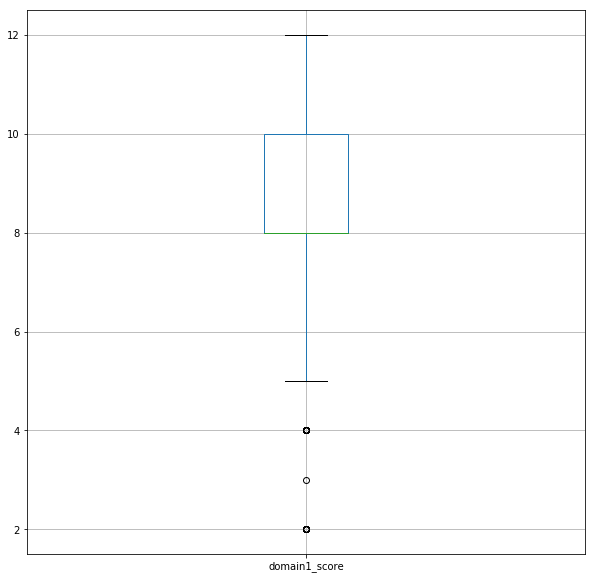

dataset 1  average word length:  4.33473967079466
dataset 1  average word count:  370.62591138530564
dataset 1  average char count:  1664.6135726303983
dataset 1  average setence count:  22.779024116657318
dataset 1  average lemma count:  120.59562535053281
dataset 1  average noun count:  124.22378014582165
dataset 1 average adj count:  15.053280987100393
dataset 1 average verb count:  24.2630398205272
dataset 1 average adv count:  13.04038137969714


In [52]:
essay_analysis(train_d1, 'domain1_score')

# prepare datasets for ML

### BOW

In [172]:
#splitting data into train data and test data (70/30)
def split_BOW_dataset(df, y_name='domain1_score',isPCA=False, n=2):
    def get_count_bag_vector(essays, features = 10000):
        vectorizer = CountVectorizer(max_features=features, ngram_range=(1,3),stop_words='english')
        count_vectors = vectorizer.fit_transform(essays)
        feature_names = vectorizer.get_feature_names()
        return feature_names, count_vectors
    feature_names_cv, count_vectors = get_count_bag_vector(df['essay'])
    if isPCA == True:
        pca = PCA(n_components = n)
        dataset_BOW = pd.DataFrame.from_records(count_vectors.toarray())
        dataset_pca = pca.fit_transform(dataset_BOW)
        X_cv = dataset_pca
    else:
        X_cv = count_vectors.toarray()
    y_cv = df[y_name].as_matrix()
    X_train, X_test, y_train, y_test = train_test_split(X_cv, y_cv, test_size=0.3)
    return X_train, X_test, y_train, y_test

In [68]:
#PCA for BOW
X_train, X_test, y_train, y_test = split_BOW_dataset(train_d1, 'domain1_score', isPCA=True, n=8)

/home/chenming/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  # This is added back by InteractiveShellApp.init_path()


In [43]:
for n in range(2,11):
    X_train, X_test, y_train, y_test = split_dataset(set_num=1, isPCA=True, n=n)
    print(n)
    lr(X_train, y_train,X_test)

/home/chenming/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  # This is added back by InteractiveShellApp.init_path()


2
Coefficients: 
 [0.09998669 0.04868705]
Mean squared error: 1.90
Root Mean squared error: 1.38


/home/chenming/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  # This is added back by InteractiveShellApp.init_path()


3
Coefficients: 
 [ 0.09619649  0.05229133 -0.10276531]
Mean squared error: 1.79
Root Mean squared error: 1.34


/home/chenming/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  # This is added back by InteractiveShellApp.init_path()


4
Coefficients: 
 [ 0.09780663  0.05769414 -0.10234929  0.12047903]
Mean squared error: 1.71
Root Mean squared error: 1.31


/home/chenming/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  # This is added back by InteractiveShellApp.init_path()


5
Coefficients: 
 [ 0.1038427   0.06065352 -0.10222466  0.13351893  0.03869418]
Mean squared error: 1.59
Root Mean squared error: 1.26


/home/chenming/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  # This is added back by InteractiveShellApp.init_path()


6
Coefficients: 
 [ 0.10329081  0.05532346 -0.09222827  0.12174879  0.041284    0.23188883]
Mean squared error: 1.37
Root Mean squared error: 1.17


/home/chenming/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  # This is added back by InteractiveShellApp.init_path()


7
Coefficients: 
 [ 0.10750368  0.05809701 -0.10073759  0.11603212  0.04071809  0.23264353
 -0.04095658]
Mean squared error: 1.46
Root Mean squared error: 1.21


/home/chenming/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  # This is added back by InteractiveShellApp.init_path()


8
Coefficients: 
 [ 0.09899677  0.05876253 -0.10906566  0.121472    0.03919092  0.23803198
 -0.0309215   0.03229291]
Mean squared error: 1.39
Root Mean squared error: 1.18


/home/chenming/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  # This is added back by InteractiveShellApp.init_path()


9
Coefficients: 
 [ 0.10106367  0.05728382 -0.09996886  0.13263419  0.04016966  0.23978124
 -0.03304856  0.04073714 -0.10556929]
Mean squared error: 1.53
Root Mean squared error: 1.24
10
Coefficients: 
 [ 0.10562124  0.05808059 -0.10045817  0.11878757  0.04217142  0.24112361
 -0.03127808  0.03942337 -0.11162862  0.03011216]
Mean squared error: 1.21
Root Mean squared error: 1.10


/home/chenming/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  # This is added back by InteractiveShellApp.init_path()


In [ ]:
#no PCA for BOW
X_train, X_test, y_train, y_test = split_BOW_dataset(train_d1, 'domain1_score', isPCA=False)

# Modeling

In [75]:
y_train.shape

(1248,)

In [76]:
# Training a linear regression model using only Bag of Words (BOW)
#model Linear regression
linearRegression = LinearRegression()
linearRegression.fit(X_train, y_train)
y_lr = linearRegression.predict(X_test)
#result

print('Coefficients: \n', linearRegression.coef_)
print('Mean squared error: %.2f'%mean_squared_error(y_test, y_lr))
print('Root Mean squared error: %.2f'%(mean_squared_error(y_test, y_lr))**0.5)

Coefficients: 
 [ 0.09907657  0.05602797 -0.09866069  0.12825838  0.04592011  0.23754523
 -0.02705084  0.04082513]
Mean squared error: 1.33
Root Mean squared error: 1.15


In [78]:
# with PCA
# Training a linear regression model using only Bag of Words (BOW)
#model Linear regression

def lr(X_train, y_train, X_test):
    linearRegression = LinearRegression()
    linearRegression.fit(X_train, y_train)
    y_lr = linearRegression.predict(X_test)
    #result

    print('Coefficients: \n', linearRegression.coef_)
    print('Mean squared error: %.2f'%mean_squared_error(y_test, y_lr))
    print('Root Mean squared error: %.2f'%(mean_squared_error(y_test, y_lr))**0.5)

### this result seems not good enought, need to reduce RMSE

In [79]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import GaussianNB

In [135]:
# algorithms review, with PCA
def evaluation_df(X_train, X_test, y_train, y_test):
    #linear regression
    linearRegression = LinearRegression()
    linearRegression.fit(X_train, y_train)
    y_lr = linearRegression.predict(X_test)
    print('Linear Regression')
    print('Mean squared error: %.2f'%mean_squared_error(y_test, y_lr))
    print('Root Mean squared error: %.2f'%(mean_squared_error(y_test, y_lr))**0.5)
    
    sgd = SGDClassifier(penalty=None)
    sgd.fit(X_train, y_train)
    y_sgd = sgd.predict(X_test)
    print('SGD')
    print('Mean squared error: %.2f'%mean_squared_error(y_test, y_sgd))
    print('Root Mean squared error: %.2f'%(mean_squared_error(y_test, y_sgd))**0.5)
    
    svc2 = SVC(C = 1.2, gamma =  0.9, kernel= 'rbf')
    svc2.fit(X_train, y_train)
    y_svc2 = svc2.predict(X_test)
    print('SVC')   
    print('Mean squared error: %.2f'%mean_squared_error(y_test, y_svc2))
    print('Root Mean squared error: %.2f'%(mean_squared_error(y_test, y_svc2))**0.5)

    randomforest = RandomForestRegressor(n_estimators=200,max_depth=5, min_samples_leaf=100,n_jobs=4)
    randomforest.fit(X_train, y_train)
    y_rf = randomforest.predict(X_test)
    print('Random Forest')   
    print('Mean squared error: %.2f'%mean_squared_error(y_test, y_rf))
    print('Root Mean squared error: %.2f'%(mean_squared_error(y_test, y_rf))**0.5)
    
    #ensemble
    y_avg = (y_lr + y_sgd + y_svc2 + y_rf)/4
    print('ensemble: ')
    print('Mean squared error: %.2f'%mean_squared_error(y_test, y_avg))
    print('Root Mean squared error: %.2f'%(mean_squared_error(y_test, y_avg))**0.5)

In [141]:
#with PCA
X_train, X_test, y_train, y_test = split_BOW_dataset(train_d1, 'domain1_score', isPCA=True, n=8)
evaluation_df(X_train, X_test, y_train, y_test)

/home/chenming/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  # This is added back by InteractiveShellApp.init_path()


Linear Regression
Mean squared error: 1.49
Root Mean squared error: 1.22
SGD
Mean squared error: 3.10
Root Mean squared error: 1.76
SVC
Mean squared error: 2.81
Root Mean squared error: 1.67
Random Forest
Mean squared error: 1.73
Root Mean squared error: 1.31
ensemble: 
Mean squared error: 1.70
Root Mean squared error: 1.30


In [143]:
alphas = np.array([3, 1, 0.3, 0.1, 0.03, 0.01])
lasso_regressor = Lasso()
grid = GridSearchCV(estimator = lasso_regressor, param_grid = dict(alpha=alphas))
grid.fit(X_train, y_train)
y_pred = grid.predict(X_test)
# summarize the results of the grid search
print(grid.best_score_)
print(grid.best_estimator_.alpha)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))


0.429552959012393
0.01
Mean squared error: 1.49


/home/chenming/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


In [137]:
#not with PCA
X_train, X_test, y_train, y_test = split_BOW_dataset(train_d1, 'domain1_score', isPCA=False)
evaluation_df(X_train, X_test, y_train, y_test)

/home/chenming/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  # This is added back by InteractiveShellApp.init_path()


Linear Regression
Mean squared error: 1.90
Root Mean squared error: 1.38
SGD
Mean squared error: 3.75
Root Mean squared error: 1.94
SVC
Mean squared error: 2.35
Root Mean squared error: 1.53
Random Forest
Mean squared error: 1.46
Root Mean squared error: 1.21
ensemble: 
Mean squared error: 1.18
Root Mean squared error: 1.09


# TF-IDF

In [100]:
#Tokenize a sentence into words
def text_preparation(input_sentence):
    REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\|@,;]')
    BAD_SYMBOLS_RE = re.compile('[^0-9a-z #+_]')
    input_sentence = input_sentence.lower()# lowercase text
    input_sentence = REPLACE_BY_SPACE_RE.sub(r' ',input_sentence).strip()# replace REPLACE_BY_SPACE_RE symbols by space in text
    input_sentence = BAD_SYMBOLS_RE.sub(r'',input_sentence)# delete symbols which are in BAD_SYMBOLS_RE from text
    stop_words = set(stopwords.words("english"))
    output_sentence = " ".join([word for word in input_sentence.split() if word not in stop_words])# delete stopwords from text
    return output_sentence

train = pd.read_csv('data/training_set_rel3.tsv',sep='\t', encoding = 'latin-1')
test = pd.read_csv('data/test_set.tsv',sep='\t', encoding = 'latin-1')
train['prepared_text'] = train['essay'].apply(text_preparation)
set_num = 1
X_cv = train[train['essay_set'] == set_num]['prepared_text'].as_matrix()
y_cv = train[train['essay_set'] == set_num]['domain1_score'].as_matrix()
X_tf_train, X_tf_test, y_tf_train, y_tf_test = train_test_split(X_cv, y_cv, test_size=0.3)

#WordsTagsCount for training
word_counts = {}
for i in X_tf_train:
    for j in i.split():
        if j not in word_counts:
            word_counts[j] = 1
        else:
            word_counts[j] += 1

In [140]:
most_common_words = sorted(word_counts.items(), key=lambda x: x[1], reverse=True)[:10]
most_common_words

[('computers', 7428),
 ('people', 7134),
 ('computer', 6386),
 ('time', 2811),
 ('friends', 2039),
 ('get', 2009),
 ('also', 2001),
 ('caps1', 1851),
 ('go', 1829),
 ('family', 1766)]

In [108]:
#WordsTagsCount for test
word_counts_test = {}
for i in X_tf_test:
    for j in i.split():
        if j not in word_counts_test:
            word_counts_test[j] = 1
        else:
            word_counts_test[j] += 1
most_common_words_test = sorted(word_counts_test.items(), key=lambda x: x[1], reverse=True)[:10]
most_common_words_test

[('computers', 3278),
 ('people', 3115),
 ('computer', 2796),
 ('time', 1221),
 ('get', 887),
 ('also', 884),
 ('use', 817),
 ('friends', 803),
 ('go', 798),
 ('caps1', 785)]

X_train_mybag = sp_sparse.vstack([sp_sparse.csr_matrix(my_bag_of_words(text, WORDS_TO_INDEX, DICT_SIZE)) for text in X_tf_train])
X_test_mybag = sp_sparse.vstack([sp_sparse.csr_matrix(my_bag_of_words(text, WORDS_TO_INDEX, DICT_SIZE)) for text in X_tf_test])
print('X_train shape ', X_train_mybag.shape)
print('X_test shape ', X_test_mybag.shape)

X_train_tfidf, X_test_tfidf, tfidf_vocab = tfidf_features(X_tf_train, X_tf_test)
tfidf_reversed_vocab = {i:word for word,i in tfidf_vocab.items()}

In [138]:
def TF_IDF_model(df,column_name):
    df['prepared_text'] = df['essay'].apply(text_preparation)
    X_cv = df['prepared_text'].as_matrix()
    y_cv = df[column_name].as_matrix()
    X_tf_train, X_tf_test, y_tf_train, y_tf_test = train_test_split(X_cv, y_cv, test_size=0.3)
    word_counts = {}
    for i in X_tf_train:
        for j in i.split():
            if j not in word_counts:
                word_counts[j] = 1
            else:
                word_counts[j] += 1
    DICT_SIZE = 5000
    WORDS_TO_INDEX = {v[0]:k for k,v in enumerate(sorted(word_counts.items(), key=lambda x: x[1], reverse=True)[:DICT_SIZE])}
    INDEX_TO_WORDS = {k:v[0] for k,v in enumerate(sorted(word_counts.items(), key=lambda x: x[1], reverse=True)[:DICT_SIZE])}
    ALL_WORDS = WORDS_TO_INDEX.keys()
    def my_bag_of_words(text, words_to_index, dict_size):
        result_vector = np.zeros(dict_size)
        for word in text.split():
            if word in words_to_index:
                result_vector[words_to_index[word]] += 1  
        return result_vector
    X_train_mybag = sp_sparse.vstack([sp_sparse.csr_matrix(my_bag_of_words(text, WORDS_TO_INDEX, DICT_SIZE)) for text in X_tf_train])
    X_test_mybag = sp_sparse.vstack([sp_sparse.csr_matrix(my_bag_of_words(text, WORDS_TO_INDEX, DICT_SIZE)) for text in X_tf_test])
    
    def tfidf_features(X_train, X_test):
        tfidf_vectorizer = TfidfVectorizer(max_df=0.9, min_df=5, stop_words='english', ngram_range=(1,2), token_pattern='(\S+)')
        tfidf_vectorizer.fit(X_train)
        X_train = tfidf_vectorizer.transform(X_train)
        X_test = tfidf_vectorizer.transform(X_test)
        return X_train, X_test, tfidf_vectorizer.vocabulary_
    
    X_train_tfidf, X_test_tfidf, tfidf_vocab = tfidf_features(X_tf_train, X_tf_test)
    tfidf_reversed_vocab = {i:word for word,i in tfidf_vocab.items()}
    
    evaluation_df(X_train_tfidf, X_test_tfidf, y_tf_train, y_tf_test)

In [139]:
TF_IDF_model(train_d1,'domain1_score')

/home/chenming/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until
/home/chenming/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  after removing the cwd from sys.path.


Linear Regression
Mean squared error: 1.29
Root Mean squared error: 1.14
SGD
Mean squared error: 2.80
Root Mean squared error: 1.67
SVC
Mean squared error: 2.41
Root Mean squared error: 1.55
Random Forest
Mean squared error: 1.78
Root Mean squared error: 1.33
ensemble: 
Mean squared error: 1.56
Root Mean squared error: 1.25


# include other features
## add other features to the dataset

In [153]:
# calculating average word length in an essay

def avg_word_len(essay):
    
    clean_essay = re.sub(r'\W', ' ', essay)
    words = nltk.word_tokenize(clean_essay)
    
    return sum(len(word) for word in words) / len(words)
# calculating number of words in an essay

def word_count(essay):
    
    clean_essay = re.sub(r'\W', ' ', essay)
    words = nltk.word_tokenize(clean_essay)
    
    return len(words)
# calculating number of characters in an essay

def char_count(essay):
    
    clean_essay = re.sub(r'\s', '', str(essay).lower())
    
    return len(clean_essay)
# calculating number of sentences in an essay

def sent_count(essay):
    
    sentences = nltk.sent_tokenize(essay)
    
    return len(sentences)
# calculating number of lemmas per essay

def count_lemmas(essay):
    tokenizer = nltk.data.load('tokenizers/punkt/english.pickle')
    tokenized_sentences = tokenizer.tokenize(essay)      
    
    lemmas = []
    wordnet_lemmatizer = WordNetLemmatizer()
    
    for sentence in tokenized_sentences:
        tagged_tokens = nltk.pos_tag(sentence) 
        
        for token_tuple in tagged_tokens:
        
            pos_tag = token_tuple[1]
        
            if pos_tag.startswith('N'): 
                pos = wordnet.NOUN
                lemmas.append(wordnet_lemmatizer.lemmatize(token_tuple[0], pos))
            elif pos_tag.startswith('J'):
                pos = wordnet.ADJ
                lemmas.append(wordnet_lemmatizer.lemmatize(token_tuple[0], pos))
            elif pos_tag.startswith('V'):
                pos = wordnet.VERB
                lemmas.append(wordnet_lemmatizer.lemmatize(token_tuple[0], pos))
            elif pos_tag.startswith('R'):
                pos = wordnet.ADV
                lemmas.append(wordnet_lemmatizer.lemmatize(token_tuple[0], pos))
            else:
                pos = wordnet.NOUN
                lemmas.append(wordnet_lemmatizer.lemmatize(token_tuple[0], pos))
    
    lemma_count = len(set(lemmas))
    
    return lemma_count
# checking number of misspelled words

def count_spell_error(essay):
    
    clean_essay = re.sub(r'\W', ' ', str(essay).lower())
    clean_essay = re.sub(r'[0-9]', '', clean_essay)
    
    #big.txt: It is a concatenation of public domain book excerpts from Project Gutenberg 
    #         and lists of most frequent words from Wiktionary and the British National Corpus.
    #         It contains about a million words.
    data = open('big.txt').read()
    
    words_ = re.findall('[a-z]+', data.lower())
    
    word_dict = collections.defaultdict(lambda: 0)
                       
    for word in words_:
        word_dict[word] += 1
                       
    clean_essay = re.sub(r'\W', ' ', str(essay).lower())
    clean_essay = re.sub(r'[0-9]', '', clean_essay)
                        
    mispell_count = 0
    
    words = clean_essay.split()
                        
    for word in words:
        if not word in word_dict:
            mispell_count += 1
    
    return mispell_count
# calculating number of nouns, adjectives, verbs and adverbs in an essay

def count_pos(essay):
    tokenizer = nltk.data.load('tokenizers/punkt/english.pickle')    
    tokenized_sentences = tokenizer.tokenize(essay)
    
    noun_count = 0
    adj_count = 0
    verb_count = 0
    adv_count = 0
    
    for sentence in tokenized_sentences:
        tagged_tokens = nltk.pos_tag(sentence)
        
        for token_tuple in tagged_tokens:
            pos_tag = token_tuple[1]
        
            if pos_tag.startswith('N'): 
                noun_count += 1
            elif pos_tag.startswith('J'):
                adj_count += 1
            elif pos_tag.startswith('V'):
                verb_count += 1
            elif pos_tag.startswith('R'):
                adv_count += 1
            
    return noun_count, adj_count, verb_count, adv_count
# getiing Bag of Words (BOW) counts

def get_count_vectors(essays):
    
    vectorizer = CountVectorizer(max_features = 10000, ngram_range=(1, 3), stop_words='english')
    
    count_vectors = vectorizer.fit_transform(essays)
    
    feature_names = vectorizer.get_feature_names()
    
    return feature_names, count_vectors

In [154]:
def extract_features(df):

    features = df.copy()
    
    features['char_count'] = features['essay'].apply(char_count)
    
    features['word_count'] = features['essay'].apply(word_count)
    
    features['sent_count'] = features['essay'].apply(sent_count)
    
    features['avg_word_len'] = features['essay'].apply(avg_word_len)
    
    features['lemma_count'] = features['essay'].apply(count_lemmas)
    
    features['spell_err_count'] = features['essay'].apply(count_spell_error)
    
    features['noun_count'], features['adj_count'], features['verb_count'], features['adv_count'] = zip(*features['essay'].map(count_pos))
    
    return features

In [155]:
features_set1 = extract_features(train_d1)


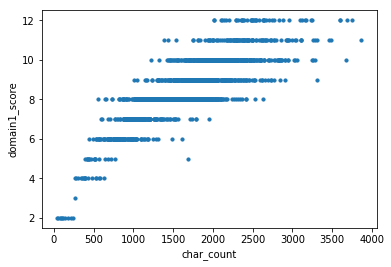

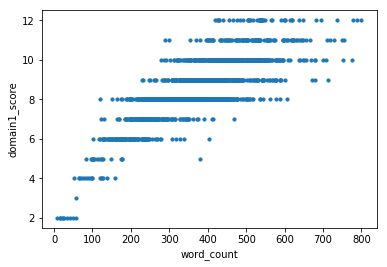

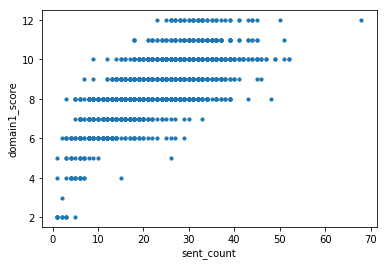

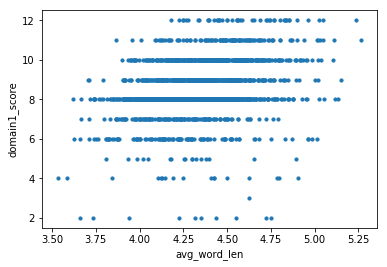

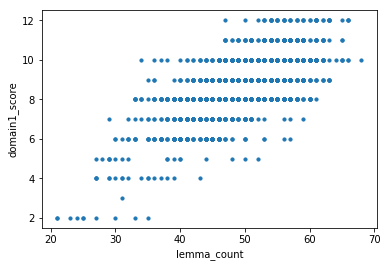

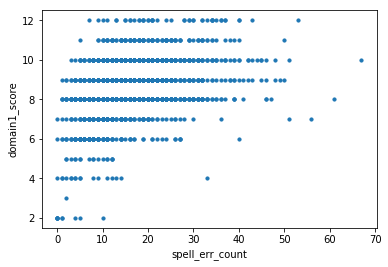

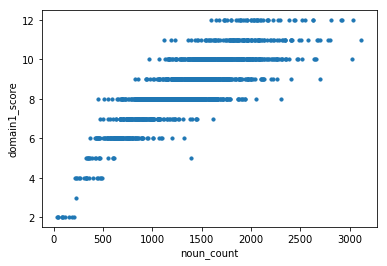

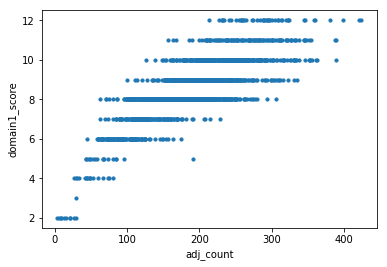

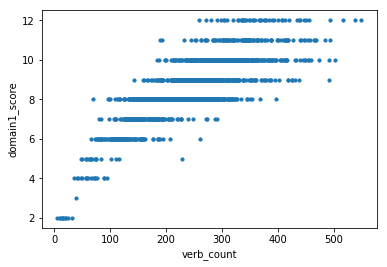

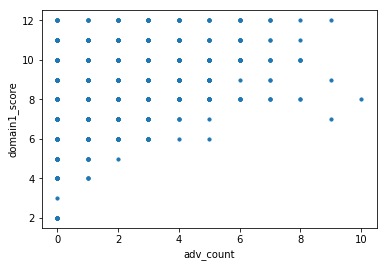

In [156]:
# Exploratory Data Analysis (EDA) on the data

%matplotlib inline
features_set1.plot.scatter(x = 'char_count', y = 'domain1_score', s=10)
features_set1.plot.scatter(x = 'word_count', y = 'domain1_score', s=10)
features_set1.plot.scatter(x = 'sent_count', y = 'domain1_score', s=10)
features_set1.plot.scatter(x = 'avg_word_len', y = 'domain1_score', s=10)
features_set1.plot.scatter(x = 'lemma_count', y = 'domain1_score', s=10)
features_set1.plot.scatter(x = 'spell_err_count', y = 'domain1_score', s=10)
features_set1.plot.scatter(x = 'noun_count', y = 'domain1_score', s=10)
features_set1.plot.scatter(x = 'adj_count', y = 'domain1_score', s=10)
features_set1.plot.scatter(x = 'verb_count', y = 'domain1_score', s=10)
features_set1.plot.scatter(x = 'adv_count', y = 'domain1_score', s=10)

In [160]:
features_set = features_set1[['char_count', 'word_count', 'sent_count', 'avg_word_len', 'lemma_count',
       'spell_err_count', 'noun_count', 'adj_count', 'verb_count',
       'adv_count']]

In [189]:
#splitting data into train data and test data (70/30)
def split_BOW_extrafeature_dataset(df, y_name='domain1_score',isPCA=False, n=2):
    features_set = extract_features(df)
    features_set = features_set[['char_count', 'word_count', 'sent_count', 'avg_word_len', 'lemma_count',
       'spell_err_count', 'noun_count', 'adj_count', 'verb_count',
       'adv_count']]
    feature_names_cv, count_vectors = get_count_bag_vector(df['essay'])
    if isPCA == True:
        pca = PCA(n_components = n)
        dataset_BOW = pd.DataFrame.from_records(count_vectors.toarray())
        dataset_pca = pca.fit_transform(dataset_BOW)
        X_cv = dataset_pca
    else:
        X_cv = count_vectors.toarray()
    X_cv = np.concatenate((features_set.as_matrix(), X_cv), axis = 1)
    y_cv = df[y_name].as_matrix()
    X_train, X_test, y_train, y_test = train_test_split(X_cv, y_cv, test_size=0.3)
    return X_train, X_test, y_train, y_test

In [163]:
X_ex_train, X_ex_test, y_ex_train, y_ex_test = split_BOW_extrafeature_dataset(train_d1,features_set , y_name='domain1_score',isPCA=True, n=8)
evaluation_df(X_ex_train, X_ex_test, y_ex_train, y_ex_test)

/home/chenming/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  if sys.path[0] == '':
/home/chenming/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  del sys.path[0]


Linear Regression
Mean squared error: 0.74
Root Mean squared error: 0.86
SGD
Mean squared error: 1.47
Root Mean squared error: 1.21
SVC
Mean squared error: 2.61
Root Mean squared error: 1.62
Random Forest
Mean squared error: 0.88
Root Mean squared error: 0.94
ensemble: 
Mean squared error: 1.04
Root Mean squared error: 1.02


In [166]:
X_ex_train, X_ex_test, y_ex_train, y_ex_test = split_BOW_extrafeature_dataset(train_d1,features_set , y_name='domain1_score',isPCA=False, n=8)
evaluation_df(X_ex_train, X_ex_test, y_ex_train, y_ex_test)

/home/chenming/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  if sys.path[0] == '':
/home/chenming/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  del sys.path[0]


Linear Regression
Mean squared error: 1.30
Root Mean squared error: 1.14


/home/chenming/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


SGD
Mean squared error: 1.81
Root Mean squared error: 1.35
SVC
Mean squared error: 2.47
Root Mean squared error: 1.57
Random Forest
Mean squared error: 0.83
Root Mean squared error: 0.91
ensemble: 
Mean squared error: 0.92
Root Mean squared error: 0.96


# dataset 2

In [177]:
#domain 2, y1 = domain1_score (1-6), y2 = domain2_score (1-4)
train_d2 = train[train['essay_set']==2]
test_d2 = test[test['essay_set']==2]
print(train_d2.shape)
train_d2.head()

(1800, 28)


,essay_id,essay_set,essay,rater1_domain1,rater2_domain1,rater3_domain1,domain1_score,rater1_domain2,rater2_domain2,domain2_score,...,rater2_trait3,rater2_trait4,rater2_trait5,rater2_trait6,rater3_trait1,rater3_trait2,rater3_trait3,rater3_trait4,rater3_trait5,rater3_trait6
1783,2978,2,Certain materials being removed from libraries...,4,4,NaN,4,4.0,4.0,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1784,2979,2,Write a persuasive essay to a newspaper reflec...,1,2,NaN,1,1.0,2.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1785,2980,2,Do you think that libraries should remove cert...,2,3,NaN,2,3.0,3.0,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1786,2981,2,"In @DATE1's world, there are many things found...",4,4,NaN,4,4.0,4.0,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1787,2982,2,In life you have the 'offensive things'. The l...,4,4,NaN,4,4.0,4.0,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [178]:
train_d2 = train_d2[['essay_id', 'essay', 'domain1_score', 'domain2_score']]
train_d2.name = 'dataset 2'

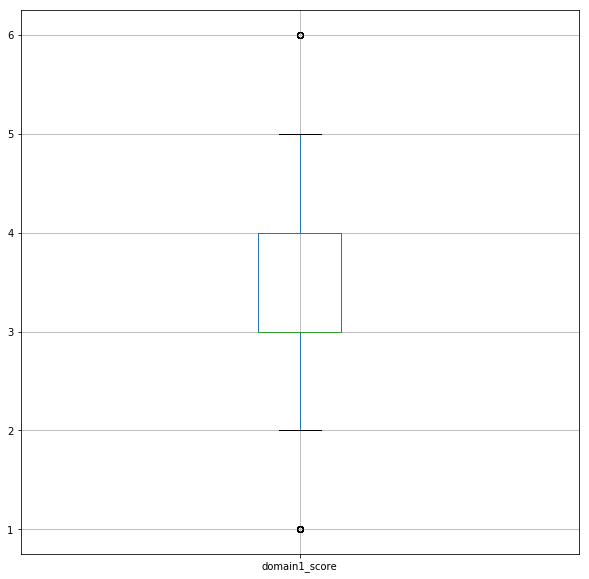

dataset 2  average word length:  4.247748099259484
dataset 2  average word count:  386.3933333333333
dataset 2  average char count:  1694.7422222222222
dataset 2  average setence count:  20.36111111111111
dataset 2  average lemma count:  109.95055555555555
dataset 2  average noun count:  115.1361111111111
dataset 2 average adj count:  16.086666666666666
dataset 2 average verb count:  24.788888888888888
dataset 2 average adv count:  10.584444444444445


In [179]:
essay_analysis(train_d2, 'domain1_score')

In [180]:
X_train, X_test, y_train, y_test = split_BOW_dataset(train_d2, 'domain1_score', isPCA=True, n=8)
evaluation_df(X_train, X_test, y_train, y_test)

/home/chenming/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  app.launch_new_instance()


Linear Regression
Mean squared error: 0.38
Root Mean squared error: 0.62
SGD
Mean squared error: 0.64
Root Mean squared error: 0.80
SVC
Mean squared error: 0.77
Root Mean squared error: 0.88
Random Forest
Mean squared error: 0.40
Root Mean squared error: 0.63
ensemble: 
Mean squared error: 0.43
Root Mean squared error: 0.65


In [181]:
X_train, X_test, y_train, y_test = split_BOW_dataset(train_d2, 'domain1_score', isPCA=False, n=8)
evaluation_df(X_train, X_test, y_train, y_test)

/home/chenming/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  app.launch_new_instance()


Linear Regression
Mean squared error: 0.56
Root Mean squared error: 0.75
SGD
Mean squared error: 0.58
Root Mean squared error: 0.76
SVC
Mean squared error: 0.93
Root Mean squared error: 0.97
Random Forest
Mean squared error: 0.41
Root Mean squared error: 0.64
ensemble: 
Mean squared error: 0.39
Root Mean squared error: 0.63


In [182]:
TF_IDF_model(train_d2,'domain1_score')

/home/chenming/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until
/home/chenming/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  after removing the cwd from sys.path.


Linear Regression
Mean squared error: 0.37
Root Mean squared error: 0.61
SGD
Mean squared error: 0.74
Root Mean squared error: 0.86
SVC
Mean squared error: 0.42
Root Mean squared error: 0.65
Random Forest
Mean squared error: 0.48
Root Mean squared error: 0.69
ensemble: 
Mean squared error: 0.38
Root Mean squared error: 0.62


In [190]:
X_ex_train, X_ex_test, y_ex_train, y_ex_test = split_BOW_extrafeature_dataset(train_d2, y_name='domain1_score',isPCA=True, n=8)
evaluation_df(X_ex_train, X_ex_test, y_ex_train, y_ex_test)

/home/chenming/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  from ipykernel import kernelapp as app
/home/chenming/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  app.launch_new_instance()


Linear Regression
Mean squared error: 0.28
Root Mean squared error: 0.53
SGD
Mean squared error: 0.45
Root Mean squared error: 0.67
SVC
Mean squared error: 0.80
Root Mean squared error: 0.90
Random Forest
Mean squared error: 0.28
Root Mean squared error: 0.53
ensemble: 
Mean squared error: 0.35
Root Mean squared error: 0.59


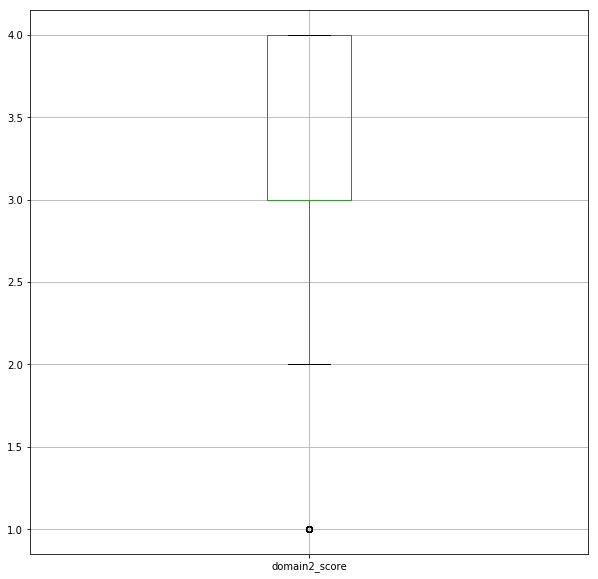

dataset 2  average word length:  4.247748099259484
dataset 2  average word count:  386.3933333333333
dataset 2  average char count:  1694.7422222222222
dataset 2  average setence count:  20.36111111111111
dataset 2  average lemma count:  109.95055555555555
dataset 2  average noun count:  115.1361111111111
dataset 2 average adj count:  16.086666666666666
dataset 2 average verb count:  24.788888888888888
dataset 2 average adv count:  10.584444444444445
use PCA in BOW evaluation


/home/chenming/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  app.launch_new_instance()


Linear Regression
Mean squared error: 0.38
Root Mean squared error: 0.62
SGD
Mean squared error: 0.67
Root Mean squared error: 0.82
SVC
Mean squared error: 0.99
Root Mean squared error: 1.00
Random Forest
Mean squared error: 0.41
Root Mean squared error: 0.64
ensemble: 
Mean squared error: 0.42
Root Mean squared error: 0.65
TF-IDF


/home/chenming/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until
/home/chenming/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  after removing the cwd from sys.path.


Linear Regression
Mean squared error: 0.39
Root Mean squared error: 0.62
SGD
Mean squared error: 0.53
Root Mean squared error: 0.73
SVC
Mean squared error: 0.45
Root Mean squared error: 0.67
Random Forest
Mean squared error: 0.45
Root Mean squared error: 0.67
ensemble: 
Mean squared error: 0.36
Root Mean squared error: 0.60
add feature to PCA BOW


/home/chenming/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  from ipykernel import kernelapp as app
/home/chenming/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  app.launch_new_instance()


Linear Regression
Mean squared error: 0.27
Root Mean squared error: 0.52
SGD
Mean squared error: 0.36
Root Mean squared error: 0.60
SVC
Mean squared error: 0.94
Root Mean squared error: 0.97
Random Forest
Mean squared error: 0.30
Root Mean squared error: 0.55
ensemble: 
Mean squared error: 0.32
Root Mean squared error: 0.57


In [193]:
# dataset 2, domain2 score
essay_analysis(train_d2, 'domain2_score')
print('use PCA in BOW evaluation')
X_train, X_test, y_train, y_test = split_BOW_dataset(train_d2, 'domain2_score', isPCA=True, n=8)
evaluation_df(X_train, X_test, y_train, y_test)

print('TF-IDF')
TF_IDF_model(train_d2,'domain2_score')

print('add feature to PCA BOW')
X_ex_train, X_ex_test, y_ex_train, y_ex_test = split_BOW_extrafeature_dataset(train_d2, y_name='domain2_score',isPCA=True, n=8)
evaluation_df(X_ex_train, X_ex_test, y_ex_train, y_ex_test)

(1726, 28)


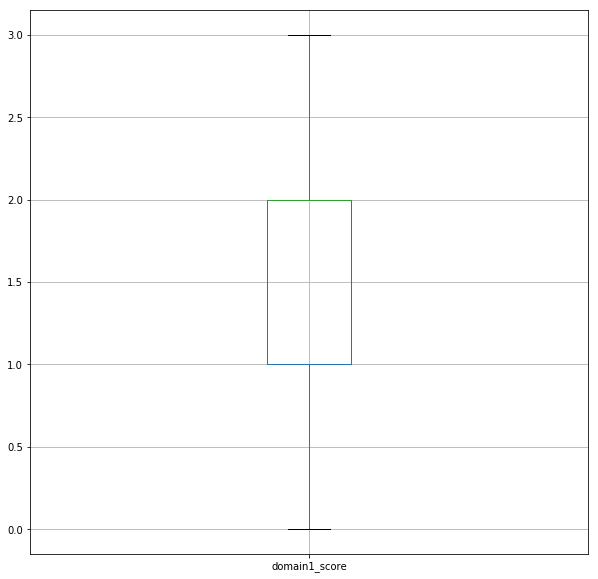

dataset 3  average word length:  4.218625907848949
dataset 3  average word count:  109.60834298957127
dataset 3  average char count:  478.83719582850523
dataset 3  average setence count:  5.936848203939745
dataset 3  average lemma count:  46.584009269988414
dataset 3  average noun count:  32.006373117033604
dataset 3 average adj count:  4.742757821552723
dataset 3 average verb count:  10.539397450753187
dataset 3 average adv count:  3.6199304750869064
use PCA in BOW evaluation


/home/chenming/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  app.launch_new_instance()


Linear Regression
Mean squared error: 0.42
Root Mean squared error: 0.65
SGD
Mean squared error: 0.67
Root Mean squared error: 0.82
SVC
Mean squared error: 0.57
Root Mean squared error: 0.76
Random Forest
Mean squared error: 0.44
Root Mean squared error: 0.66
ensemble: 
Mean squared error: 0.42
Root Mean squared error: 0.65
TF-IDF


/home/chenming/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until
/home/chenming/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  after removing the cwd from sys.path.


Linear Regression
Mean squared error: 1.09
Root Mean squared error: 1.04
SGD
Mean squared error: 0.82
Root Mean squared error: 0.91
SVC
Mean squared error: 0.57
Root Mean squared error: 0.75
Random Forest
Mean squared error: 0.57
Root Mean squared error: 0.75
ensemble: 
Mean squared error: 0.52
Root Mean squared error: 0.72
add feature to PCA BOW


/home/chenming/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  from ipykernel import kernelapp as app
/home/chenming/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  app.launch_new_instance()


Linear Regression
Mean squared error: 0.31
Root Mean squared error: 0.56
SGD
Mean squared error: 0.47
Root Mean squared error: 0.69
SVC
Mean squared error: 1.41
Root Mean squared error: 1.19
Random Forest
Mean squared error: 0.31
Root Mean squared error: 0.55
ensemble: 
Mean squared error: 0.38
Root Mean squared error: 0.62


In [195]:
# dataset 3
train_d3 = train[train['essay_set']==3]
test_d3 = test[test['essay_set']==3]
print(train_d3.shape)
train_d3 = train_d3[['essay_id', 'essay', 'domain1_score']]
train_d3.name = 'dataset 3'

essay_analysis(train_d3, 'domain1_score')
print('use PCA in BOW evaluation')
X_train, X_test, y_train, y_test = split_BOW_dataset(train_d3, 'domain1_score', isPCA=True, n=8)
evaluation_df(X_train, X_test, y_train, y_test)

print('TF-IDF')
TF_IDF_model(train_d3,'domain1_score')

print('add feature to PCA BOW')
X_ex_train, X_ex_test, y_ex_train, y_ex_test = split_BOW_extrafeature_dataset(train_d3, y_name='domain1_score',isPCA=True, n=8)
evaluation_df(X_ex_train, X_ex_test, y_ex_train, y_ex_test)

(1770, 28)


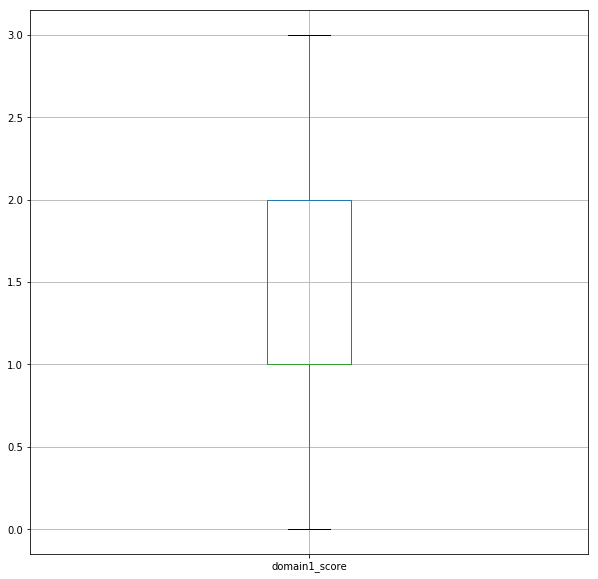

dataset 4  average word length:  4.238999201806222
dataset 4  average word count:  95.24293785310735
dataset 4  average char count:  415.6593220338983
dataset 4  average setence count:  4.459887005649717
dataset 4  average lemma count:  36.30734463276836
dataset 4  average noun count:  29.005649717514125
dataset 4 average adj count:  3.397175141242938
dataset 4 average verb count:  7.410169491525424
dataset 4 average adv count:  2.5627118644067797
use PCA in BOW evaluation


/home/chenming/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  app.launch_new_instance()


Linear Regression
Mean squared error: 0.37
Root Mean squared error: 0.61
SGD
Mean squared error: 0.52
Root Mean squared error: 0.72
SVC
Mean squared error: 0.51
Root Mean squared error: 0.71
Random Forest
Mean squared error: 0.39
Root Mean squared error: 0.63
ensemble: 
Mean squared error: 0.34
Root Mean squared error: 0.58
TF-IDF


/home/chenming/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until
/home/chenming/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  after removing the cwd from sys.path.


Linear Regression
Mean squared error: 0.83
Root Mean squared error: 0.91
SGD
Mean squared error: 0.79
Root Mean squared error: 0.89
SVC
Mean squared error: 0.50
Root Mean squared error: 0.71
Random Forest
Mean squared error: 0.49
Root Mean squared error: 0.70
ensemble: 
Mean squared error: 0.42
Root Mean squared error: 0.64
add feature to PCA BOW


/home/chenming/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  from ipykernel import kernelapp as app
/home/chenming/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  app.launch_new_instance()


Linear Regression
Mean squared error: 0.30
Root Mean squared error: 0.54
SGD
Mean squared error: 0.82
Root Mean squared error: 0.91
SVC
Mean squared error: 1.04
Root Mean squared error: 1.02
Random Forest
Mean squared error: 0.31
Root Mean squared error: 0.56
ensemble: 
Mean squared error: 0.38
Root Mean squared error: 0.62


In [196]:
# dataset 4
train_d4 = train[train['essay_set']==4]
test_d4 = test[test['essay_set']==4]
print(train_d4.shape)
train_d4 = train_d4[['essay_id', 'essay', 'domain1_score']]
train_d4.name = 'dataset 4'

essay_analysis(train_d4, 'domain1_score')
print('use PCA in BOW evaluation')
X_train, X_test, y_train, y_test = split_BOW_dataset(train_d4, 'domain1_score', isPCA=True, n=8)
evaluation_df(X_train, X_test, y_train, y_test)

print('TF-IDF')
TF_IDF_model(train_d4,'domain1_score')

print('add feature to PCA BOW')
X_ex_train, X_ex_test, y_ex_train, y_ex_test = split_BOW_extrafeature_dataset(train_d4, y_name='domain1_score',isPCA=True, n=8)
evaluation_df(X_ex_train, X_ex_test, y_ex_train, y_ex_test)

(1805, 28)


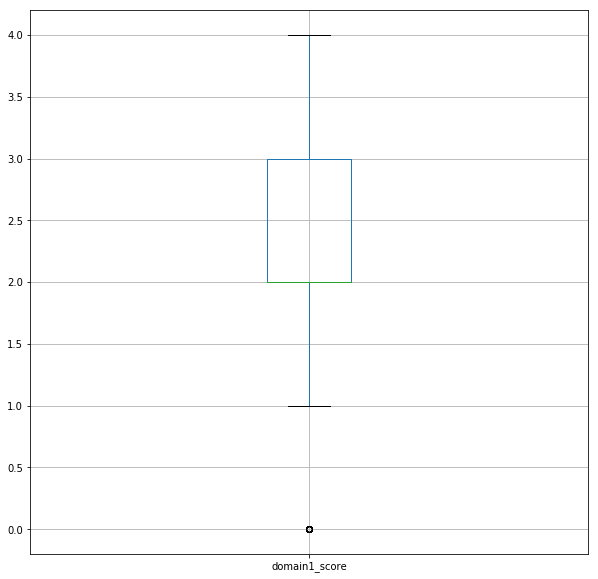

dataset 5  average word length:  4.358046268184359
dataset 5  average word count:  123.2404432132964
dataset 5  average char count:  562.0454293628809
dataset 5  average setence count:  6.6415512465373965
dataset 5  average lemma count:  47.06094182825485
dataset 5  average noun count:  39.802216066481996
dataset 5 average adj count:  4.522991689750692
dataset 5 average verb count:  8.240443213296398
dataset 5 average adv count:  4.207756232686981
use PCA in BOW evaluation


/home/chenming/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  app.launch_new_instance()


Linear Regression
Mean squared error: 0.36
Root Mean squared error: 0.60
SGD
Mean squared error: 0.67
Root Mean squared error: 0.82
SVC
Mean squared error: 0.55
Root Mean squared error: 0.74
Random Forest
Mean squared error: 0.37
Root Mean squared error: 0.61
ensemble: 
Mean squared error: 0.37
Root Mean squared error: 0.61
TF-IDF


/home/chenming/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until
/home/chenming/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  after removing the cwd from sys.path.


Linear Regression
Mean squared error: 0.64
Root Mean squared error: 0.80
SGD
Mean squared error: 0.97
Root Mean squared error: 0.98
SVC
Mean squared error: 0.56
Root Mean squared error: 0.75
Random Forest
Mean squared error: 0.60
Root Mean squared error: 0.78
ensemble: 
Mean squared error: 0.47
Root Mean squared error: 0.68
add feature to PCA BOW


/home/chenming/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  from ipykernel import kernelapp as app
/home/chenming/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  app.launch_new_instance()


Linear Regression
Mean squared error: 0.28
Root Mean squared error: 0.53
SGD
Mean squared error: 0.68
Root Mean squared error: 0.83
SVC
Mean squared error: 1.20
Root Mean squared error: 1.09
Random Forest
Mean squared error: 0.29
Root Mean squared error: 0.53
ensemble: 
Mean squared error: 0.41
Root Mean squared error: 0.64


In [197]:
# dataset 5
train_d5 = train[train['essay_set']==5]
test_d5 = test[test['essay_set']==5]
print(train_d5.shape)
train_d5 = train_d5[['essay_id', 'essay', 'domain1_score']]
train_d5.name = 'dataset 5'

essay_analysis(train_d5, 'domain1_score')
print('use PCA in BOW evaluation')
X_train, X_test, y_train, y_test = split_BOW_dataset(train_d5, 'domain1_score', isPCA=True, n=8)
evaluation_df(X_train, X_test, y_train, y_test)

print('TF-IDF')
TF_IDF_model(train_d5,'domain1_score')

print('add feature to PCA BOW')
X_ex_train, X_ex_test, y_ex_train, y_ex_test = split_BOW_extrafeature_dataset(train_d5, y_name='domain1_score',isPCA=True, n=8)
evaluation_df(X_ex_train, X_ex_test, y_ex_train, y_ex_test)

(1800, 28)


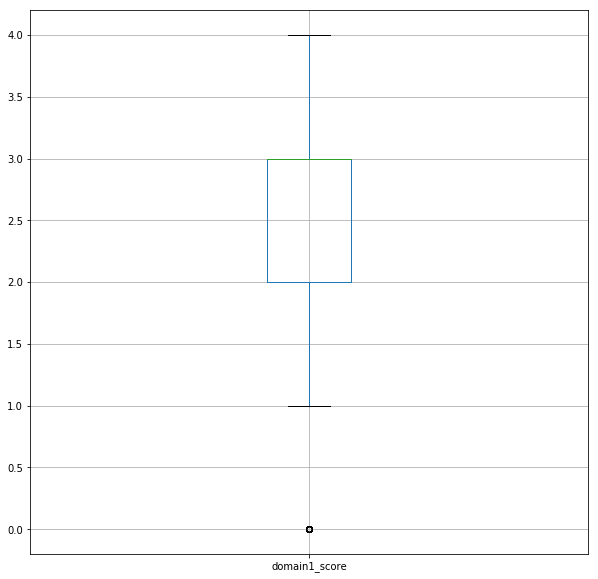

dataset 6  average word length:  4.6434853927469195
dataset 6  average word count:  154.81444444444443
dataset 6  average char count:  739.6461111111112
dataset 6  average setence count:  7.802777777777778
dataset 6  average lemma count:  65.64666666666666
dataset 6  average noun count:  50.227222222222224
dataset 6 average adj count:  9.21888888888889
dataset 6 average verb count:  13.188333333333333
dataset 6 average adv count:  4.897777777777778
use PCA in BOW evaluation


/home/chenming/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  app.launch_new_instance()


Linear Regression
Mean squared error: 0.44
Root Mean squared error: 0.66
SGD
Mean squared error: 0.71
Root Mean squared error: 0.85
SVC
Mean squared error: 0.80
Root Mean squared error: 0.89
Random Forest
Mean squared error: 0.62
Root Mean squared error: 0.79
ensemble: 
Mean squared error: 0.49
Root Mean squared error: 0.70
TF-IDF


/home/chenming/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until
/home/chenming/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  after removing the cwd from sys.path.


Linear Regression
Mean squared error: 0.49
Root Mean squared error: 0.70
SGD
Mean squared error: 0.88
Root Mean squared error: 0.94
SVC
Mean squared error: 0.61
Root Mean squared error: 0.78
Random Forest
Mean squared error: 0.52
Root Mean squared error: 0.72
ensemble: 
Mean squared error: 0.44
Root Mean squared error: 0.66
add feature to PCA BOW


/home/chenming/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  from ipykernel import kernelapp as app
/home/chenming/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  app.launch_new_instance()


Linear Regression
Mean squared error: 0.35
Root Mean squared error: 0.60
SGD
Mean squared error: 0.71
Root Mean squared error: 0.84
SVC
Mean squared error: 0.95
Root Mean squared error: 0.98
Random Forest
Mean squared error: 0.41
Root Mean squared error: 0.64
ensemble: 
Mean squared error: 0.41
Root Mean squared error: 0.64


In [198]:
# dataset 6
train_d6 = train[train['essay_set']==6]
test_d6 = test[test['essay_set']==6]
print(train_d6.shape)
train_d6 = train_d6[['essay_id', 'essay', 'domain1_score']]
train_d6.name = 'dataset 6'

essay_analysis(train_d6, 'domain1_score')
print('use PCA in BOW evaluation')
X_train, X_test, y_train, y_test = split_BOW_dataset(train_d6, 'domain1_score', isPCA=True, n=8)
evaluation_df(X_train, X_test, y_train, y_test)

print('TF-IDF')
TF_IDF_model(train_d6,'domain1_score')

print('add feature to PCA BOW')
X_ex_train, X_ex_test, y_ex_train, y_ex_test = split_BOW_extrafeature_dataset(train_d6, y_name='domain1_score',isPCA=True, n=8)
evaluation_df(X_ex_train, X_ex_test, y_ex_train, y_ex_test)

(1569, 28)


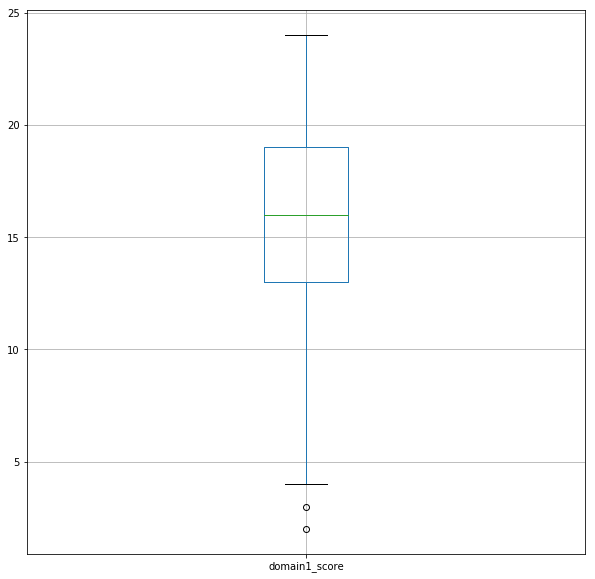

dataset 7  average word length:  3.7682038929314703
dataset 7  average word count:  170.2734225621415
dataset 7  average char count:  676.1121733588272
dataset 7  average setence count:  11.698534098151688
dataset 7  average lemma count:  58.67240280433397
dataset 7  average noun count:  48.323773103887824
dataset 7 average adj count:  3.8712555768005097
dataset 7 average verb count:  16.003824091778203
dataset 7 average adv count:  5.835564053537285
use PCA in BOW evaluation


/home/chenming/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  app.launch_new_instance()


Linear Regression
Mean squared error: 15.17
Root Mean squared error: 3.90
SGD
Mean squared error: 25.01
Root Mean squared error: 5.00
SVC
Mean squared error: 20.19
Root Mean squared error: 4.49
Random Forest
Mean squared error: 13.93
Root Mean squared error: 3.73
ensemble: 
Mean squared error: 14.74
Root Mean squared error: 3.84
TF-IDF


/home/chenming/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until
/home/chenming/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  after removing the cwd from sys.path.


Linear Regression
Mean squared error: 15.88
Root Mean squared error: 3.98
SGD
Mean squared error: 24.90
Root Mean squared error: 4.99
SVC
Mean squared error: 20.24
Root Mean squared error: 4.50
Random Forest
Mean squared error: 14.24
Root Mean squared error: 3.77
ensemble: 
Mean squared error: 13.02
Root Mean squared error: 3.61
add feature to PCA BOW


/home/chenming/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  from ipykernel import kernelapp as app
/home/chenming/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  app.launch_new_instance()
/home/chenming/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


Linear Regression
Mean squared error: 8.68
Root Mean squared error: 2.95
SGD
Mean squared error: 14.94
Root Mean squared error: 3.87
SVC
Mean squared error: 19.56
Root Mean squared error: 4.42
Random Forest
Mean squared error: 9.20
Root Mean squared error: 3.03
ensemble: 
Mean squared error: 9.76
Root Mean squared error: 3.12


In [199]:
# dataset 7
train_d7 = train[train['essay_set']==7]
test_d7 = test[test['essay_set']==7]
print(train_d7.shape)
train_d7 = train_d7[['essay_id', 'essay', 'domain1_score']]
train_d7.name = 'dataset 7'

essay_analysis(train_d7, 'domain1_score')
print('use PCA in BOW evaluation')
X_train, X_test, y_train, y_test = split_BOW_dataset(train_d7, 'domain1_score', isPCA=True, n=8)
evaluation_df(X_train, X_test, y_train, y_test)

print('TF-IDF')
TF_IDF_model(train_d7,'domain1_score')

print('add feature to PCA BOW')
X_ex_train, X_ex_test, y_ex_train, y_ex_test = split_BOW_extrafeature_dataset(train_d7, y_name='domain1_score',isPCA=True, n=8)
evaluation_df(X_ex_train, X_ex_test, y_ex_train, y_ex_test)

(723, 28)


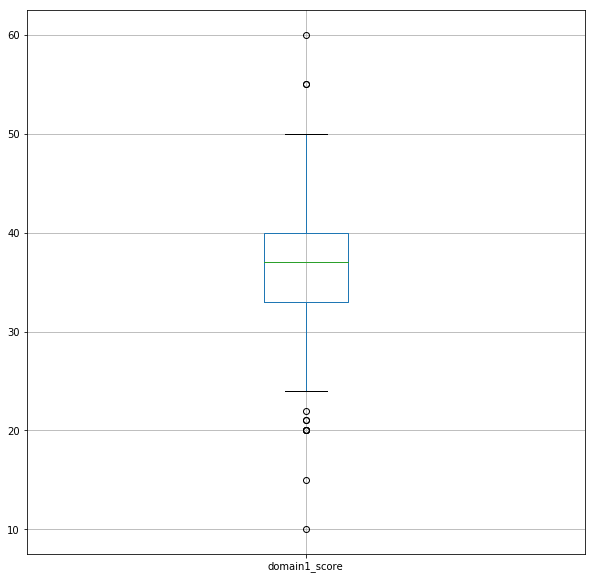

dataset 8  average word length:  4.0179206530666
dataset 8  average word count:  614.6473029045643
dataset 8  average char count:  2569.4467496542184
dataset 8  average setence count:  34.8686030428769
dataset 8  average lemma count:  177.87966804979254
dataset 8  average noun count:  168.49792531120332
dataset 8 average adj count:  20.775933609958507
dataset 8 average verb count:  55.37206085753804
dataset 8 average adv count:  23.518672199170126
use PCA in BOW evaluation


/home/chenming/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  app.launch_new_instance()


Linear Regression
Mean squared error: 32.79
Root Mean squared error: 5.73
SGD
Mean squared error: 51.49
Root Mean squared error: 7.18
SVC
Mean squared error: 45.73
Root Mean squared error: 6.76
Random Forest
Mean squared error: 29.91
Root Mean squared error: 5.47
ensemble: 
Mean squared error: 32.43
Root Mean squared error: 5.69
TF-IDF


/home/chenming/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until
/home/chenming/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  after removing the cwd from sys.path.


Linear Regression
Mean squared error: 26.37
Root Mean squared error: 5.14
SGD
Mean squared error: 66.28
Root Mean squared error: 8.14
SVC
Mean squared error: 49.60
Root Mean squared error: 7.04
Random Forest
Mean squared error: 33.46
Root Mean squared error: 5.78
ensemble: 
Mean squared error: 34.21
Root Mean squared error: 5.85
add feature to PCA BOW


/home/chenming/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  from ipykernel import kernelapp as app
/home/chenming/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  app.launch_new_instance()


Linear Regression
Mean squared error: 19.85
Root Mean squared error: 4.46
SGD
Mean squared error: 46.59
Root Mean squared error: 6.83
SVC
Mean squared error: 45.74
Root Mean squared error: 6.76
Random Forest
Mean squared error: 24.27
Root Mean squared error: 4.93
ensemble: 
Mean squared error: 26.92
Root Mean squared error: 5.19


In [200]:
# dataset 8
train_d8 = train[train['essay_set']==8]
test_d8 = test[test['essay_set']==8]
print(train_d8.shape)
train_d8 = train_d8[['essay_id', 'essay', 'domain1_score']]
train_d8.name = 'dataset 8'

essay_analysis(train_d8, 'domain1_score')
print('use PCA in BOW evaluation')
X_train, X_test, y_train, y_test = split_BOW_dataset(train_d8, 'domain1_score', isPCA=True, n=8)
evaluation_df(X_train, X_test, y_train, y_test)

print('TF-IDF')
TF_IDF_model(train_d8,'domain1_score')

print('add feature to PCA BOW')
X_ex_train, X_ex_test, y_ex_train, y_ex_test = split_BOW_extrafeature_dataset(train_d8, y_name='domain1_score',isPCA=True, n=8)
evaluation_df(X_ex_train, X_ex_test, y_ex_train, y_ex_test)

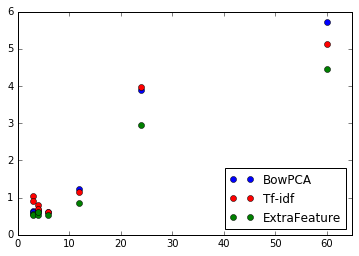

In [235]:
#data plot
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#modeling validation results
ranges = [12,6,3,3,4,4,24,60]
BowPCA = [1.22,0.62,0.65,0.61,0.6,0.66,3.9,5.73]
Tfidf = [1.14,0.61,1.04,0.91,0.8,0.7,3.98,5.14]
ExtraFeature = [0.86,0.53,0.56,0.54,0.53,0.6,2.95,4.46]
df_out1 = pd.DataFrame(list(zip(BowPCA, Tfidf,ExtraFeature,ranges)), columns =['BowPCA', 'Tf-idf','ExtraFeature','ranges']) 
fig, ax = plt.subplots()
ax.plot(df_out1['ranges'], df_out1['BowPCA'], 'ob', label='BowPCA')
ax.plot(df_out1['ranges'], df_out1['Tf-idf'], 'or', label='Tf-idf')
ax.plot(df_out1['ranges'], df_out1['ExtraFeature'], 'og', label='ExtraFeature')
leg = ax.legend(loc=4)
plt.xlim(0,65)


plt.show()


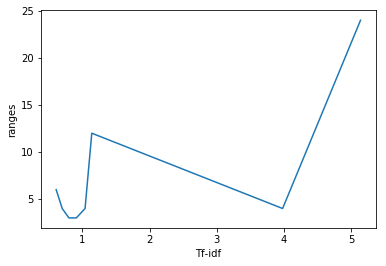

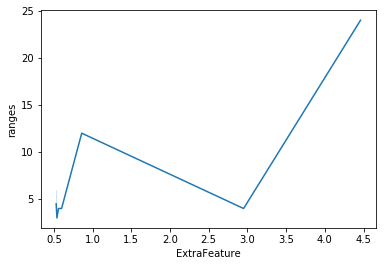